<center><img src = "https://www.usmagazine.com/wp-content/uploads/2020/04/Kevin-The-Office-chili.gif">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.drop('customerID', axis= 1, inplace = True )
cols = df.columns
display(df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<div class="sc-hsqudQ jLlgeO"><div class="sc-kLezXb koExtg"><div style="min-height: 80px;"><div class="markdown-converter__text--rendered"><h3>Context</h3>
<p>"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."  [IBM Sample Data Sets]</p>
<h3>Content</h3>
<p>Each row represents a customer, each column contains customer’s attributes described on the column Metadata.</p>
<p><strong>The data set includes information about:</strong></p>
<ul>
<li>Customers who left within the last month – the column is called Churn</li>
<li>Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies</li>
<li>Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges</li>
<li>Demographic info about customers – gender, age range, and if they have partners and dependents</li>
</ul>
<h3>Inspiration</h3>
<p>To explore this type of models and learn more about the subject.</p>
<p><strong>New version from IBM:</strong><br>
<a rel="noreferrer nofollow" target="_blank" href="https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113">https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113</a></p></div></div></div>

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


None

In [4]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df = pd.DataFrame(enc.fit_transform(df), columns = cols)
df = df.astype(int)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


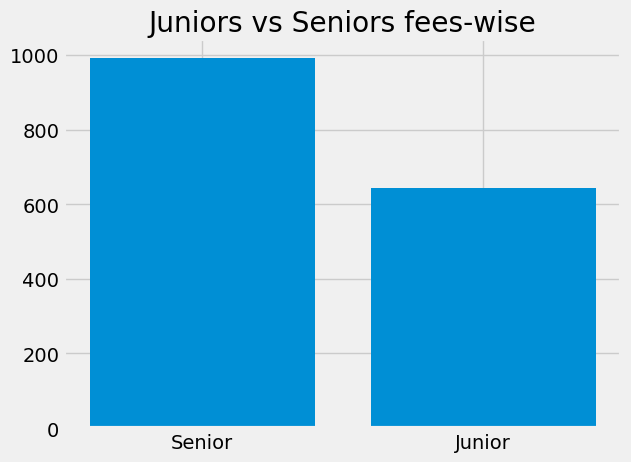

In [5]:
plt.bar(['Senior', 'Junior'], [df[df.SeniorCitizen == 1].MonthlyCharges.median(), df[df.SeniorCitizen == 0].MonthlyCharges.median()]);
plt.title('Juniors vs Seniors fees-wise');

### An older person, usually over the age of 60 or 65, esp. one who is no longer employed, senior citizens are expected to get discounts, that doesn't seem to be the case here.

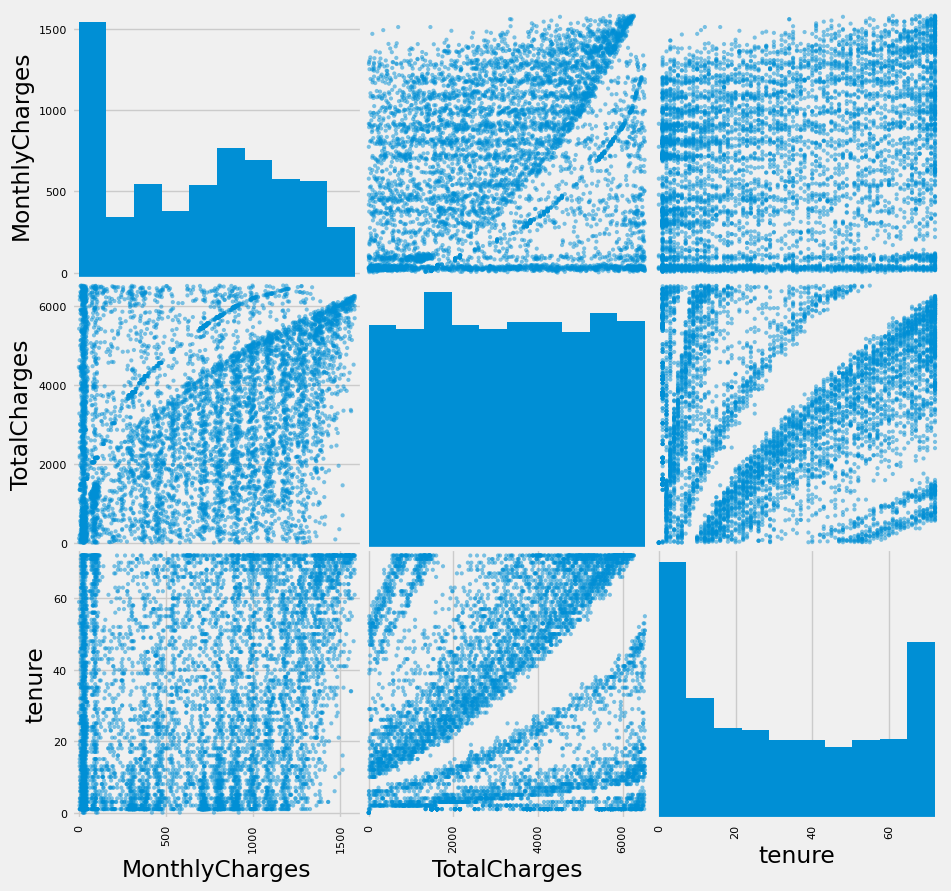

In [6]:
pd.plotting.scatter_matrix(df[['MonthlyCharges', 'TotalCharges', 'tenure']], figsize= (10, 10));

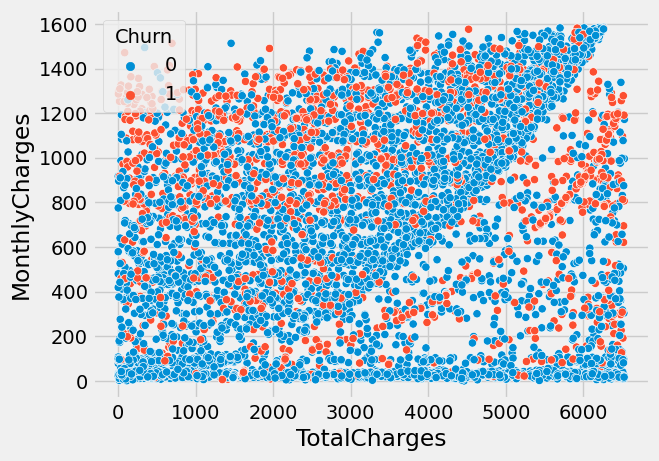

In [7]:
g =sns.scatterplot(x="TotalCharges", y="MonthlyCharges",
              hue="Churn",
              data=df);

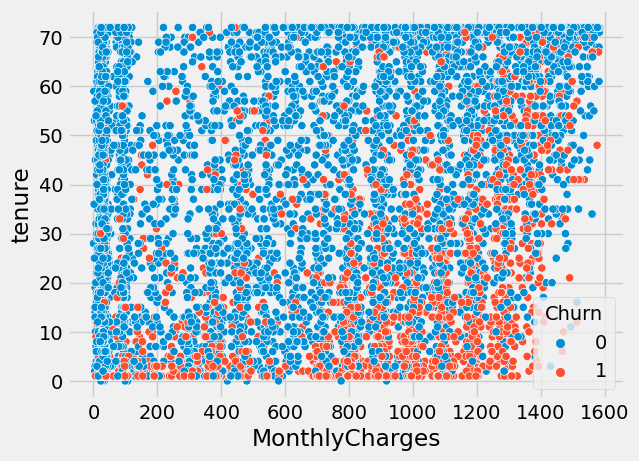

In [8]:
g =sns.scatterplot(x="MonthlyCharges", y="tenure",
              hue="Churn",
              data=df);

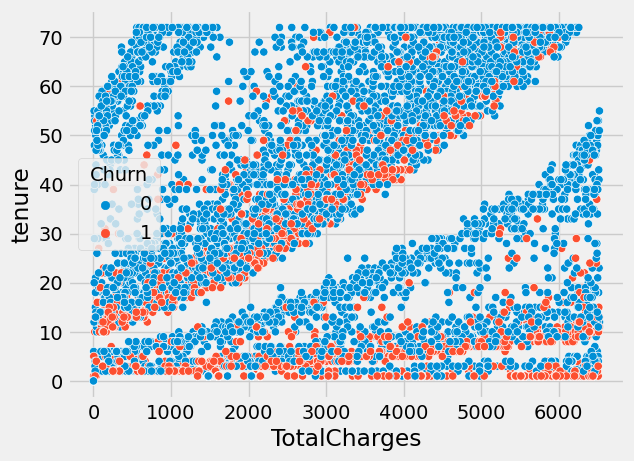

In [9]:
g =sns.scatterplot(x="TotalCharges", y="tenure",
              hue="Churn",
              data=df);

#### Nothing catchy here :/

### Trying some models and stuff...

In [10]:
from sklearn.model_selection import train_test_split
X = df.values[:, :-1]
y = df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_cv)

def eval(y_pred, y_cv = y_cv):
    print("Accuracy:",accuracy_score(y_cv, y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_cv, y_pred))
    print("Classification Report:\n",classification_report(y_cv, y_pred))
    print("ROC AUC Score:",roc_auc_score(y_cv, y_pred))

eval(y_pred)


Accuracy: 0.765791341376863
Confusion Matrix:
 [[783 248]
 [ 82 296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.83      1031
           1       0.54      0.78      0.64       378

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409

ROC AUC Score: 0.7712628105450607


In [65]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train, y_train)
y_pred = LR.predict(X_cv)
eval(y_pred)

Accuracy: 0.8168914123491838
Confusion Matrix:
 [[935  96]
 [162 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1031
           1       0.69      0.57      0.63       378

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

ROC AUC Score: 0.7391575446861577


In [18]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier().fit(X_train, y_train)
y_pred = RFC.predict(X_cv)
eval(y_pred)

Accuracy: 0.801277501774308
Confusion Matrix:
 [[931 100]
 [180 198]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1031
           1       0.66      0.52      0.59       378

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC Score: 0.7134081566671285


In [19]:
import xgboost as xgb
xgbc = xgb.XGBClassifier().fit(X_train, y_train)
y_pred = xgbc.predict(X_cv)
eval(y_pred)

Accuracy: 0.7984386089425124
Confusion Matrix:
 [[914 117]
 [167 211]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1031
           1       0.64      0.56      0.60       378

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC Score: 0.722359500972498


In [25]:
from sklearn.svm import SVC
svc = SVC(kernel= 'sigmoid').fit(X_train, y_train)
y_pred = svc.predict(X_cv)
eval(y_pred)

Accuracy: 0.638041163946061
Confusion Matrix:
 [[794 237]
 [273 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.76      1031
           1       0.31      0.28      0.29       378

    accuracy                           0.64      1409
   macro avg       0.53      0.52      0.52      1409
weighted avg       0.63      0.64      0.63      1409

ROC AUC Score: 0.5239519344756978


In [47]:
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

es = [('gnb', GaussianNB()), ('RF', RandomForestClassifier())]
fe = SVC(kernel = 'sigmoid', C = 500, gamma = 0.01)
model = StackingClassifier(estimators= es, n_jobs = -1, final_estimator= fe).fit(X_train, y_train.ravel())

In [48]:
eval(model.predict(X_cv))

Accuracy: 0.801277501774308
Confusion Matrix:
 [[940  91]
 [189 189]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1031
           1       0.68      0.50      0.57       378

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC Score: 0.7058680892337537


In [53]:
#fine tune the logistic regression model
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression(multi_class= 'ovr', max_iter= 1000, n_jobs= -1)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
grid = GridSearchCV(LR, param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train.ravel())
grid.best_params_


Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.787 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.762 total time=   0.0s
[CV 1/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.782 total time=   2.7s
[CV 2/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.743 total time=   0.7s
[CV 3/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.779 total time=   0.7s
[CV 4/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.787 total time=   0.7s
[CV 5/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.762 total time=   0.7s
[CV 1/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 2/5] END C=0.001, penalty

{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [67]:
LR = LogisticRegression(multi_class= 'multinomial', max_iter= 1000, n_jobs= -1, C = 100, penalty = 'l2', solver = 'newton-cg').fit(X_train, y_train)
y_pred = LR.predict(X_cv)
eval(y_pred)

Accuracy: 0.8176011355571328
Confusion Matrix:
 [[930 101]
 [156 222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1031
           1       0.69      0.59      0.63       378

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409

ROC AUC Score: 0.744669222360784


### Looks like it's gonna be the good old logistic regression after all!

In [68]:
y_pred = LR.predict(X_test)
eval(y_pred, y_test)

Accuracy: 0.8147622427253371
Confusion Matrix:
 [[937 101]
 [160 211]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1038
           1       0.68      0.57      0.62       371

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409

ROC AUC Score: 0.7357153244109291


### That's good enough for now, let's move on to the finals' crams for exams.
#### Wish me luck, and I hope you do well in yours too 💕